# New ts_gen

In [1]:
import torch
torch.cuda.empty_cache()

In [2]:
from utils.meta_eval import TSGenArgs, create_ds_dict, plot_ds
from experiments.meta_eval.me import experiment

args = TSGenArgs()
args.n_epochs = 1
args.test_interval = 1
args.gnn_depth = 2
args.n_layers = 2
# args.remove_existing_data = True

exp_log = experiment(args)

Starting training...
100%|██████████| 843/843 [00:49<00:00, 16.93it/s]
Epoch 1: Training Loss 0.3337788420081753
106it [00:03, 34.59it/s]
Epoch 1: Test Loss 0.36409000597201635
Best Test Loss 0.36409000597201635 on Epoch 1


In [3]:
file_name = 'test.npy'
exp_log.save_Ds(file_name, save_to_log_dir=True)
exp_log.save_Ws(file_name, save_to_log_dir=True)
exp_log.plot_loss(save_fig = True)

/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

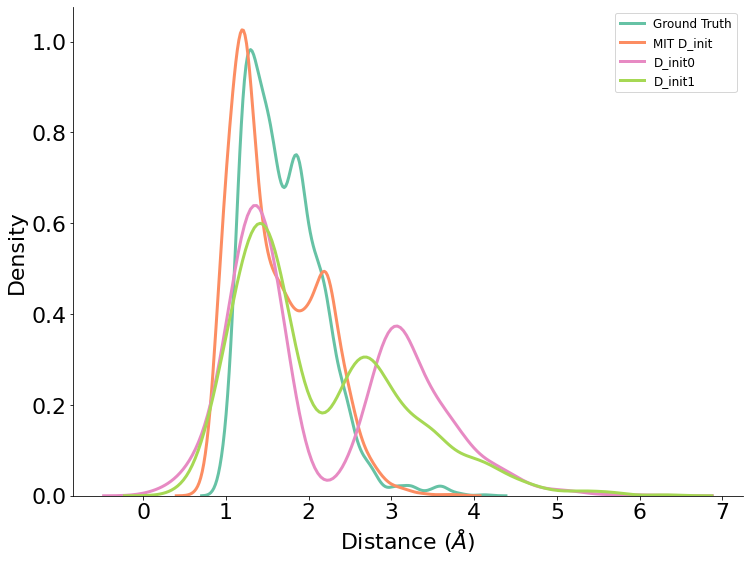

In [62]:
import os

# create ds_dict and plot d_inits
mols_folder = 'data/raw/'
d_folder = 'experiments/meta_eval/d_inits/'

d_plot_name = os.path.join(os.path.dirname(args.log_dir), 'dplot') # None won't save fig
# b/d/n=standard; h=32 1(e=20), 2(e=30)
# standard: 1(e=100,t=2500s), 3(e=10, t=400s), 4(e=30, t=1200s), 5(e=50, t=1900s), 6(e=100, t=3850s)
# 09/08: 10(e=100,t=3580)
d_files = ['1.npy', '10.npy'] 
ds_not_to_print = ['lin_approx']
ds_dict = create_ds_dict(d_files, d_folder, mols_folder) # TODO: create default d_init class for these?
plot_ds(ds_dict, ds_not_to_print, d_plot_name)

## Ensemble

Average all produced $D_{inits}s$ then plot.

In [ ]:
from utils.meta_eval import ensemble_plot

d_files = ['1.npy', '6.npy'] 
ds_dict = create_ds_dict(d_files, d_folder, mols_folder)
ds_not_to_print = ['lin_approx']

ensemble_plot(ds_dict, ds_not_to_print)

ImportError: cannot import name 'ensemble_plot'